#### 1.Read a file constitution.txt. Create a dictionary with an entry for each letter in the alphabet. The keys are letters and the values will be the counts of the number of times a letter has viewed. Go through each character in `data`, skipping characters that aren't letters. For every letter, increment the count stored in `letter_counts` for that letter. Create a bar chart for the letter frequencies.

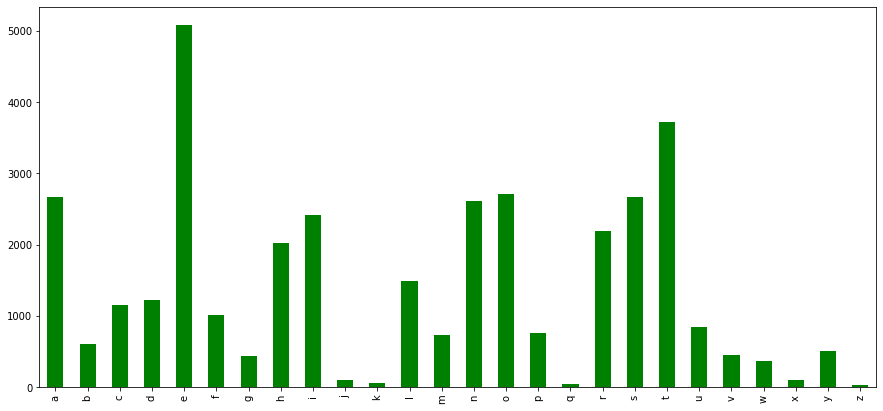

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

file_obj=open('constitution.txt','r')
dict={}
for letter in file_obj.read().lower():
    if letter.isalpha():
        if letter in dict:
            dict[letter]+=1
        else:
            dict[letter]=1
series=pd.Series(dict)
pd.DataFrame(series)
series.sort_index().plot.bar(figsize=(15,7),color='green')
plt.xticks(rotation = 90)
plt.show()

#### Create a Python program to find and remove duplicate files from a given folder location or subfolder location passed as input.

##### a. Find & Drop duplicate files by names.



In [2]:

import os

path = input("Enter the path of the folder: ")

filelist=[]
def getfiles(path):
    files=os.listdir(path)
    for f in files:
        if os.path.isfile(path+"/"+f):
            if f not in filelist:
                filelist.append(f)
            else:
                print(f+" is removed from "+path)
                os.remove(path+"/"+f)
        elif os.path.isdir(path+"/"+f):
            getfiles(path+"/"+f)
    return filelist
    
print("Distint files are ",getfiles(path))

Enter the path of the folder: C:\Users\anu\Documents\python programs\folderexample
index.html is removed from C:\Users\anu\Documents\python programs\folderexample/New folder
Distint files are  ['index.html', 'text4.txt', 'text1.txt']


##### b. Find & Drop duplicate files by content. (Hint: Use hashlib)

In [3]:
import hashlib
def filehashing(filename):
    hasher = hashlib.sha1()
    with open(filename, 'rb') as f:
        while True:
            data = f.read()
            if not data:
                break
            hasher.update(data)
    return hasher.hexdigest()
# print(filehashing("C:/Users/anu/Documents/python programs/folderexample/text2.txt"))

In [4]:

import os

path = input("Enter the path of the folder: ")

filelist=[]
hasherlist=[]
def getfiles(path):
    files=os.listdir(path)
    for f in files:
        if os.path.isfile(path+"/"+f):
            hashvalue=filehashing(path+"/"+f)
            if hashvalue not in hasherlist:
                hasherlist.append(hashvalue)
                filelist.append(f)
            else:
                print(f+" is removed from "+path)
                os.remove(path+"/"+f)
        elif os.path.isdir(path+"/"+f):
            getfiles(path+"/"+f)
    return filelist
    
print("Distint files are ",getfiles(path))

Enter the path of the folder: C:\Users\anu\Documents\python programs\folderexample
Distint files are  ['index.html', 'text4.txt', 'text1.txt']


### 3.View and analyse the dataset using Pandas. 

#### a.Read data from csv file Federal Aviation Authority (FAA) Dataset

In [5]:
import numpy as np
dataset =pd.read_csv('faa_ai_prelim.csv')

#### b. View content of the data


In [6]:
display(dataset)

,UPDATED,ENTRY_DATE,EVENT_LCL_DATE,EVENT_LCL_TIME,LOC_CITY_NAME,LOC_STATE_NAME,LOC_CNTRY_NAME,RMK_TEXT,EVENT_TYPE_DESC,FSDO_DESC,...,PAX_INJ_NONE,PAX_INJ_MINOR,PAX_INJ_SERIOUS,PAX_INJ_FATAL,PAX_INJ_UNK,GRND_INJ_NONE,GRND_INJ_MINOR,GRND_INJ_SERIOUS,GRND_INJ_FATAL,GRND_INJ_UNK
0,No,19-FEB-16,19-FEB-16,00:45:00Z,MARSHVILLE,North Carolina,NaN,"AIRCRAFT CRASHED INTO TREES, THE 1 PERSON ON B...",Accident,FAA Charlotte FSDO-68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,19-FEB-16,18-FEB-16,23:55:00Z,TAVERNIER,Florida,NaN,AIRCRAFT ON LANDING WENT OFF THE END OF THE RU...,Incident,FAA Miami FSDO-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,No,19-FEB-16,18-FEB-16,22:14:00Z,TRENTON,New Jersey,NaN,"AIRCRAFT ON FINAL SUSTAINED A BIRD STRIKE, LAN...",Incident,FAA Philadelphia FSDO-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,19-FEB-16,18-FEB-16,17:10:00Z,ASHEVILLE,North Carolina,NaN,"AIRCRAFT ON LANDING, GEAR COLLAPSED, ASHEVILLE...",Incident,FAA Charlotte FSDO-68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,No,19-FEB-16,18-FEB-16,00:26:00Z,TALKEETNA,Alaska,NaN,"AIRCRAFT ON LANDING, NOSE GEAR COLLAPSED, TALK...",Incident,FAA Anchorage FSDO-03,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,No,08-FEB-16,31-DEC-15,17:00:00Z,SAN ANTONIO,Texas,NaN,"AIRCRAFT ON LANDING, GROUND LOOPED, BULVERDE A...",Accident,FAA San Antonio FSDO-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,No,08-FEB-16,05-FEB-16,11:17:00Z,MARICOPA,Arizona,NaN,"AIRCRAFT CRASHED UNDER UNKNOWN CIRCUMSTANCES, ...",Accident,FAA Scottsdale FSDO-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,No,08-FEB-16,05-FEB-16,23:02:00Z,SAN PEDRO,California,NaN,"N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...",Accident,FAA Long Beach FSDO-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,No,08-FEB-16,05-FEB-16,23:02:00Z,SAN PEDRO,California,NaN,"N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...",Accident,FAA Long Beach FSDO-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### c. View the dataset shape

In [7]:
dataset.shape

(83, 42)

#### d. Show all the columns present in the dataset

In [8]:
dataset.columns

Index(['UPDATED', 'ENTRY_DATE', 'EVENT_LCL_DATE', 'EVENT_LCL_TIME',
       'LOC_CITY_NAME', 'LOC_STATE_NAME', 'LOC_CNTRY_NAME', 'RMK_TEXT',
       'EVENT_TYPE_DESC', 'FSDO_DESC', 'REGIST_NBR', 'FLT_NBR', 'ACFT_OPRTR',
       'ACFT_MAKE_NAME', 'ACFT_MODEL_NAME', 'ACFT_MISSING_FLAG',
       'ACFT_DMG_DESC', 'FLT_ACTIVITY', 'FLT_PHASE', 'FAR_PART', 'MAX_INJ_LVL',
       'FATAL_FLAG', 'FLT_CRW_INJ_NONE', 'FLT_CRW_INJ_MINOR',
       'FLT_CRW_INJ_SERIOUS', 'FLT_CRW_INJ_FATAL', 'FLT_CRW_INJ_UNK',
       'CBN_CRW_INJ_NONE', 'CBN_CRW_INJ_MINOR', 'CBN_CRW_INJ_SERIOUS',
       'CBN_CRW_INJ_FATAL', 'CBN_CRW_INJ_UNK', 'PAX_INJ_NONE', 'PAX_INJ_MINOR',
       'PAX_INJ_SERIOUS', 'PAX_INJ_FATAL', 'PAX_INJ_UNK', 'GRND_INJ_NONE',
       'GRND_INJ_MINOR', 'GRND_INJ_SERIOUS', 'GRND_INJ_FATAL', 'GRND_INJ_UNK'],
      dtype='object')

#### e.Extract the following attributes from the dataset: 
##### 'ACFT_MAKE_NAME', 'LOC_STATE_NAME', 'ACFT_MODEL_NAME', 'RMK_TEXT', 'FLT_PHASE', 'EVENT_TYPE_DESC', 'FATAL_FLAG'


In [9]:
keys=['ACFT_MAKE_NAME', 'LOC_STATE_NAME', 'ACFT_MODEL_NAME', 'RMK_TEXT', 'FLT_PHASE', "EVENT_TYPE_DESC", 'FATAL_FLAG']
dataset[keys]

,ACFT_MAKE_NAME,LOC_STATE_NAME,ACFT_MODEL_NAME,RMK_TEXT,FLT_PHASE,EVENT_TYPE_DESC,FATAL_FLAG
0,BEECH,North Carolina,36,"AIRCRAFT CRASHED INTO TREES, THE 1 PERSON ON B...",UNKNOWN (UNK),Accident,Yes
1,VANS,Florida,RV7,AIRCRAFT ON LANDING WENT OFF THE END OF THE RU...,LANDING (LDG),Incident,NaN
2,CESSNA,New Jersey,172,"AIRCRAFT ON FINAL SUSTAINED A BIRD STRIKE, LAN...",APPROACH (APR),Incident,NaN
3,LANCAIR,North Carolina,235,"AIRCRAFT ON LANDING, GEAR COLLAPSED, ASHEVILLE...",LANDING (LDG),Incident,NaN
4,CESSNA,Alaska,172,"AIRCRAFT ON LANDING, NOSE GEAR COLLAPSED, TALK...",LANDING (LDG),Incident,NaN
...,...,...,...,...,...,...,...
78,AERONCA,Texas,O58B,"AIRCRAFT ON LANDING, GROUND LOOPED, BULVERDE A...",LANDING (LDG),Accident,NaN
79,NORTH AMERICAN,Arizona,F51,"AIRCRAFT CRASHED UNDER UNKNOWN CIRCUMSTANCES, ...",UNKNOWN (UNK),Accident,Yes
80,CHAMPION,California,8KCAB,"N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...",UNKNOWN (UNK),Accident,Yes
81,BEECH,California,35,"N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...",UNKNOWN (UNK),Accident,Yes


#### f.Show missing values count for each column. 

In [10]:
dataset.isnull().sum()

UPDATED                 0
ENTRY_DATE              0
EVENT_LCL_DATE          0
EVENT_LCL_TIME          0
LOC_CITY_NAME           0
LOC_STATE_NAME          0
LOC_CNTRY_NAME         81
RMK_TEXT                0
EVENT_TYPE_DESC         0
FSDO_DESC               2
REGIST_NBR              0
FLT_NBR                77
ACFT_OPRTR             76
ACFT_MAKE_NAME          5
ACFT_MODEL_NAME         4
ACFT_MISSING_FLAG      83
ACFT_DMG_DESC           1
FLT_ACTIVITY           70
FLT_PHASE               1
FAR_PART               82
MAX_INJ_LVL             3
FATAL_FLAG             75
FLT_CRW_INJ_NONE       19
FLT_CRW_INJ_MINOR      77
FLT_CRW_INJ_SERIOUS    82
FLT_CRW_INJ_FATAL      75
FLT_CRW_INJ_UNK        83
CBN_CRW_INJ_NONE       83
CBN_CRW_INJ_MINOR      83
CBN_CRW_INJ_SERIOUS    83
CBN_CRW_INJ_FATAL      83
CBN_CRW_INJ_UNK        82
PAX_INJ_NONE           66
PAX_INJ_MINOR          82
PAX_INJ_SERIOUS        80
PAX_INJ_FATAL          82
PAX_INJ_UNK            83
GRND_INJ_NONE          83
GRND_INJ_MIN

#### g.Clean the dataset and replace the fatal flag NaN with “No”

In [11]:

dataset1=dataset.replace(np.nan,"No")
dataset1

,UPDATED,ENTRY_DATE,EVENT_LCL_DATE,EVENT_LCL_TIME,LOC_CITY_NAME,LOC_STATE_NAME,LOC_CNTRY_NAME,RMK_TEXT,EVENT_TYPE_DESC,FSDO_DESC,...,PAX_INJ_NONE,PAX_INJ_MINOR,PAX_INJ_SERIOUS,PAX_INJ_FATAL,PAX_INJ_UNK,GRND_INJ_NONE,GRND_INJ_MINOR,GRND_INJ_SERIOUS,GRND_INJ_FATAL,GRND_INJ_UNK
0,No,19-FEB-16,19-FEB-16,00:45:00Z,MARSHVILLE,North Carolina,No,"AIRCRAFT CRASHED INTO TREES, THE 1 PERSON ON B...",Accident,FAA Charlotte FSDO-68,...,No,No,No,No,No,No,No,No,No,No
1,No,19-FEB-16,18-FEB-16,23:55:00Z,TAVERNIER,Florida,No,AIRCRAFT ON LANDING WENT OFF THE END OF THE RU...,Incident,FAA Miami FSDO-19,...,No,No,No,No,No,No,No,No,No,No
2,No,19-FEB-16,18-FEB-16,22:14:00Z,TRENTON,New Jersey,No,"AIRCRAFT ON FINAL SUSTAINED A BIRD STRIKE, LAN...",Incident,FAA Philadelphia FSDO-17,...,No,No,No,No,No,No,No,No,No,No
3,No,19-FEB-16,18-FEB-16,17:10:00Z,ASHEVILLE,North Carolina,No,"AIRCRAFT ON LANDING, GEAR COLLAPSED, ASHEVILLE...",Incident,FAA Charlotte FSDO-68,...,No,No,No,No,No,No,No,No,No,No
4,No,19-FEB-16,18-FEB-16,00:26:00Z,TALKEETNA,Alaska,No,"AIRCRAFT ON LANDING, NOSE GEAR COLLAPSED, TALK...",Incident,FAA Anchorage FSDO-03,...,No,1.0,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,No,08-FEB-16,31-DEC-15,17:00:00Z,SAN ANTONIO,Texas,No,"AIRCRAFT ON LANDING, GROUND LOOPED, BULVERDE A...",Accident,FAA San Antonio FSDO-17,...,No,No,No,No,No,No,No,No,No,No
79,No,08-FEB-16,05-FEB-16,11:17:00Z,MARICOPA,Arizona,No,"AIRCRAFT CRASHED UNDER UNKNOWN CIRCUMSTANCES, ...",Accident,FAA Scottsdale FSDO-07,...,No,No,No,No,No,No,No,No,No,No
80,No,08-FEB-16,05-FEB-16,23:02:00Z,SAN PEDRO,California,No,"N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...",Accident,FAA Long Beach FSDO-05,...,No,No,No,No,No,No,No,No,No,No
81,No,08-FEB-16,05-FEB-16,23:02:00Z,SAN PEDRO,California,No,"N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...",Accident,FAA Long Beach FSDO-05,...,No,No,No,No,No,No,No,No,No,No


#### h. Verify if the missing values are replaced.

In [12]:
dataset.isnull().sum()

UPDATED                 0
ENTRY_DATE              0
EVENT_LCL_DATE          0
EVENT_LCL_TIME          0
LOC_CITY_NAME           0
LOC_STATE_NAME          0
LOC_CNTRY_NAME         81
RMK_TEXT                0
EVENT_TYPE_DESC         0
FSDO_DESC               2
REGIST_NBR              0
FLT_NBR                77
ACFT_OPRTR             76
ACFT_MAKE_NAME          5
ACFT_MODEL_NAME         4
ACFT_MISSING_FLAG      83
ACFT_DMG_DESC           1
FLT_ACTIVITY           70
FLT_PHASE               1
FAR_PART               82
MAX_INJ_LVL             3
FATAL_FLAG             75
FLT_CRW_INJ_NONE       19
FLT_CRW_INJ_MINOR      77
FLT_CRW_INJ_SERIOUS    82
FLT_CRW_INJ_FATAL      75
FLT_CRW_INJ_UNK        83
CBN_CRW_INJ_NONE       83
CBN_CRW_INJ_MINOR      83
CBN_CRW_INJ_SERIOUS    83
CBN_CRW_INJ_FATAL      83
CBN_CRW_INJ_UNK        82
PAX_INJ_NONE           66
PAX_INJ_MINOR          82
PAX_INJ_SERIOUS        80
PAX_INJ_FATAL          82
PAX_INJ_UNK            83
GRND_INJ_NONE          83
GRND_INJ_MIN

#### i.Remove all the observations where aircraft names (ACFT_MAKE_NAME) are not available

In [13]:

dataset2=dataset.dropna(subset=['ACFT_MAKE_NAME'])
dataset2


,UPDATED,ENTRY_DATE,EVENT_LCL_DATE,EVENT_LCL_TIME,LOC_CITY_NAME,LOC_STATE_NAME,LOC_CNTRY_NAME,RMK_TEXT,EVENT_TYPE_DESC,FSDO_DESC,...,PAX_INJ_NONE,PAX_INJ_MINOR,PAX_INJ_SERIOUS,PAX_INJ_FATAL,PAX_INJ_UNK,GRND_INJ_NONE,GRND_INJ_MINOR,GRND_INJ_SERIOUS,GRND_INJ_FATAL,GRND_INJ_UNK
0,No,19-FEB-16,19-FEB-16,00:45:00Z,MARSHVILLE,North Carolina,NaN,"AIRCRAFT CRASHED INTO TREES, THE 1 PERSON ON B...",Accident,FAA Charlotte FSDO-68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,19-FEB-16,18-FEB-16,23:55:00Z,TAVERNIER,Florida,NaN,AIRCRAFT ON LANDING WENT OFF THE END OF THE RU...,Incident,FAA Miami FSDO-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,No,19-FEB-16,18-FEB-16,22:14:00Z,TRENTON,New Jersey,NaN,"AIRCRAFT ON FINAL SUSTAINED A BIRD STRIKE, LAN...",Incident,FAA Philadelphia FSDO-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,19-FEB-16,18-FEB-16,17:10:00Z,ASHEVILLE,North Carolina,NaN,"AIRCRAFT ON LANDING, GEAR COLLAPSED, ASHEVILLE...",Incident,FAA Charlotte FSDO-68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,No,19-FEB-16,18-FEB-16,00:26:00Z,TALKEETNA,Alaska,NaN,"AIRCRAFT ON LANDING, NOSE GEAR COLLAPSED, TALK...",Incident,FAA Anchorage FSDO-03,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,No,08-FEB-16,31-DEC-15,17:00:00Z,SAN ANTONIO,Texas,NaN,"AIRCRAFT ON LANDING, GROUND LOOPED, BULVERDE A...",Accident,FAA San Antonio FSDO-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,No,08-FEB-16,05-FEB-16,11:17:00Z,MARICOPA,Arizona,NaN,"AIRCRAFT CRASHED UNDER UNKNOWN CIRCUMSTANCES, ...",Accident,FAA Scottsdale FSDO-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,No,08-FEB-16,05-FEB-16,23:02:00Z,SAN PEDRO,California,NaN,"N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...",Accident,FAA Long Beach FSDO-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,No,08-FEB-16,05-FEB-16,23:02:00Z,SAN PEDRO,California,NaN,"N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...",Accident,FAA Long Beach FSDO-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### j.Find the aircraft types and their occurrences in the dataset

In [26]:

dataset['ACFT_MAKE_NAME'].value_counts()


CESSNA                    23
PIPER                     10
BEECH                      9
MOONEY                     4
BOEING                     3
LANCAIR                    2
BELL                       2
CHAMPION                   2
SOCATA                     2
GRUMMAN                    1
AEROSTAR INTERNATIONAL     1
AIRBUS                     1
AERO COMMANDER             1
GULFSTREAM                 1
FLIGHT DESIGN              1
SABRELINER                 1
AERONCA                    1
PITTS                      1
EMBRAER                    1
ENSTROM                    1
MAULE                      1
VANS                       1
SAAB                       1
FAIRCHILD                  1
CONSOLIDATED VULTEE        1
GREAT LAKES                1
GLOBE                      1
HUGHES                     1
CHRISTEN                   1
NORTH AMERICAN             1
Name: ACFT_MAKE_NAME, dtype: int64

#### k.Display the observations where fatal flag is “Yes”.


In [14]:
dataset[dataset['FATAL_FLAG']=='Yes']

,UPDATED,ENTRY_DATE,EVENT_LCL_DATE,EVENT_LCL_TIME,LOC_CITY_NAME,LOC_STATE_NAME,LOC_CNTRY_NAME,RMK_TEXT,EVENT_TYPE_DESC,FSDO_DESC,...,PAX_INJ_NONE,PAX_INJ_MINOR,PAX_INJ_SERIOUS,PAX_INJ_FATAL,PAX_INJ_UNK,GRND_INJ_NONE,GRND_INJ_MINOR,GRND_INJ_SERIOUS,GRND_INJ_FATAL,GRND_INJ_UNK
0,No,19-FEB-16,19-FEB-16,00:45:00Z,MARSHVILLE,North Carolina,NaN,"AIRCRAFT CRASHED INTO TREES, THE 1 PERSON ON B...",Accident,FAA Charlotte FSDO-68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,No,17-FEB-16,16-FEB-16,20:52:00Z,BUCKEYE,Arizona,NaN,"AIRCRAFT, LIGHT SPORT EVOLUTION REVO, ON TAKE...",Accident,FAA Scottsdale FSDO-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,No,12-FEB-16,11-FEB-16,11:32:00Z,DESTIN,Florida,United States,AIRCRAFT CRASHED UNDER UNKNOWN CIRCUMSTANCES. ...,Accident,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
55,No,11-FEB-16,11-FEB-16,00:17:00Z,TULARE,California,NaN,AIRCRAFT CRASHED UNDER UNKNOWN CIRCUMSTANCES A...,Accident,FAA Fresno FSDO-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,No,08-FEB-16,05-FEB-16,11:17:00Z,MARICOPA,Arizona,NaN,"AIRCRAFT CRASHED UNDER UNKNOWN CIRCUMSTANCES, ...",Accident,FAA Scottsdale FSDO-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,No,08-FEB-16,05-FEB-16,23:02:00Z,SAN PEDRO,California,NaN,"N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...",Accident,FAA Long Beach FSDO-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,No,08-FEB-16,05-FEB-16,23:02:00Z,SAN PEDRO,California,NaN,"N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...",Accident,FAA Long Beach FSDO-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,Yes,02-FEB-16,02-FEB-16,01:52:00Z,MOBILE,Alabama,NaN,N784CP AIRCRAFT CRASHED INTO A WOODED AREA NEA...,Accident,FAA Birmingham FSDO-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### l.Show the accidents with fatality.

In [15]:
dataset[dataset['EVENT_TYPE_DESC']=='Accident']

,UPDATED,ENTRY_DATE,EVENT_LCL_DATE,EVENT_LCL_TIME,LOC_CITY_NAME,LOC_STATE_NAME,LOC_CNTRY_NAME,RMK_TEXT,EVENT_TYPE_DESC,FSDO_DESC,...,PAX_INJ_NONE,PAX_INJ_MINOR,PAX_INJ_SERIOUS,PAX_INJ_FATAL,PAX_INJ_UNK,GRND_INJ_NONE,GRND_INJ_MINOR,GRND_INJ_SERIOUS,GRND_INJ_FATAL,GRND_INJ_UNK
0,No,19-FEB-16,19-FEB-16,00:45:00Z,MARSHVILLE,North Carolina,NaN,"AIRCRAFT CRASHED INTO TREES, THE 1 PERSON ON B...",Accident,FAA Charlotte FSDO-68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,No,19-FEB-16,18-FEB-16,20:23:00Z,PEARL HARBOR,Hawaii,NaN,N80918 BELL 206B ROTORCRAFT CRASHED INTO THE W...,Accident,FAA Honolulu FSDO-13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,No,17-FEB-16,14-FEB-16,17:00:00Z,BELL CITY,Louisiana,NaN,AIRCRAFT ON TAKEOFF WENT OFF THE GRASS STRIP A...,Accident,FAA Baton Rouge FSDO-03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,No,17-FEB-16,16-FEB-16,17:29:00Z,BENCHLEY,Texas,NaN,AIRCRAFT FORCE LANDED IN A FIELD 2 MILES FROM ...,Accident,FAA Houston FSDO-09,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,No,17-FEB-16,16-FEB-16,20:52:00Z,BUCKEYE,Arizona,NaN,"AIRCRAFT, LIGHT SPORT EVOLUTION REVO, ON TAKE...",Accident,FAA Scottsdale FSDO-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,No,16-FEB-16,12-FEB-16,23:00:00Z,SANTA PAULA,California,NaN,"AIRCRAFT, N704SL CESSNA 150, AND N57BC AVIAT ...",Accident,FAA Van Nuys FSDO-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,No,16-FEB-16,12-FEB-16,23:00:00Z,SANTA PAULA,California,NaN,"AIRCRAFT, N704SL CESSNA 150, AND N57BC AVIAT ...",Accident,FAA Van Nuys FSDO-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,No,16-FEB-16,12-FEB-16,15:30:00Z,SHIRLEY,New York,NaN,"AIRCRAFT LANDED, STRUCK A SNOWBANK AND CAUGHT ...",Accident,FAA Farmingdale FSDO-11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,No,16-FEB-16,13-FEB-16,18:00:00Z,INDEPENDENCE,Oregon,NaN,"AIRCRAFT ON LANDING, GEAR COLLAPSED AND GROUND...",Accident,FAA Portland FSDO-09,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,No,16-FEB-16,13-FEB-16,16:30:00Z,PETALUMA,California,NaN,"N3647A AEROSTAR INTERNATIONAL RX8 BALLOON, ON ...",Accident,FAA Oakland FSDO-27,...,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
